In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/grains/seeds-width-vs-length.csv', header=None)

In [3]:
df.columns = ['width', 'length']

In [4]:
df.head()

,width,length
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658


In [5]:
width = df['width'].values
length = df['length'].values

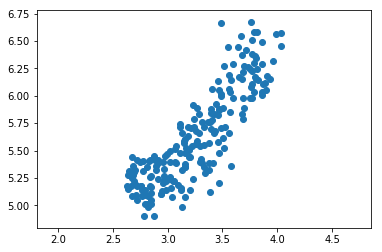

In [6]:
plt.scatter(x=width, y=length)
plt.axis('equal')
plt.show()

### Pearson Correlation

Let's see if the width and length of the grain samples are correlated.  We use Pearson correlation which gives us a number between -1 and 1 where 0 means no correlation.  The higher the absolute value of this number, the larger the correlation.  We see that width and length are, indeed, highly correlated.

In [7]:
from scipy.stats import pearsonr

correlation, pvalue = pearsonr(width, length)
print(correlation)

0.8604149377143467


### Principal Component

Let's figure out which direction data varies the most by using Principal Component Analysis and plotting the first compoenent as an arrow.  It shows that, in general, as width increases, length increases.<br/>
IMPORTANT: notice that we're fitting the data using PCA but not transforming it here.  

In [8]:
grains = np.stack((width, length), axis=1)

In [9]:
grains.ndim

2

#### which direction does grain data vary the most?

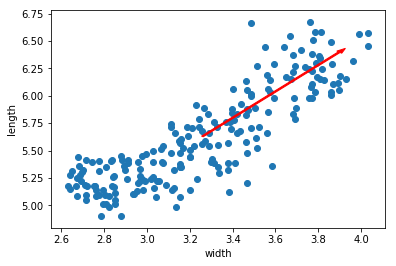

In [10]:
from sklearn.decomposition import PCA

plt.scatter(grains[:,0], grains[:,1])
plt.xlabel('width')
plt.ylabel('length')

model = PCA()
model.fit(grains)

# Get the mean of the grains samples
mean = model.mean_

# Get the first principal component
first_pc = model.components_[0, :]

# Plot the first component as an arraow starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.show()

## Decorrelating the features

Let's decorrelate the features and take a look at their Pearson correlation afterwards.<br/>
IMPORTANT: notice that, now, we're fitting then transforming the data.  We observer that there is no correlation between the PCA features.

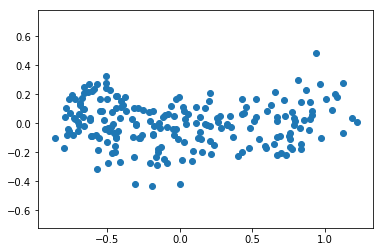

1.2457761499088403e-16


In [11]:
from sklearn.decomposition import PCA

model = PCA()
pca_features = model.fit_transform(grains)

xs = pca_features[:, 0]
ys = pca_features[:, 1]

plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

correlation, pvalue = pearsonr(xs, ys)
print(correlation)

## Variance of PCA features

You will see that PCA features 0 and 1 have significant variance<br/>

As a result, the intrinsic dimension of this dataset appears to be 2



In [14]:
df_fish = pd.read_csv('data/fish_measurements.csv', header=None)
df_fish.head()

# drop the labels (column 0)
samples_df = df_fish.drop(df_fish.columns[0], axis=1)
samples = samples_df.as_matrix()
samples[0:10]

/Users/arajuljulian/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[242. ,  23.2,  25.4,  30. ,  38.4,  13.4],
       [290. ,  24. ,  26.3,  31.2,  40. ,  13.8],
       [340. ,  23.9,  26.5,  31.1,  39.8,  15.1],
       [363. ,  26.3,  29. ,  33.5,  38. ,  13.3],
       [430. ,  26.5,  29. ,  34. ,  36.6,  15.1],
       [450. ,  26.8,  29.7,  34.7,  39.2,  14.2],
       [500. ,  26.8,  29.7,  34.5,  41.1,  15.3],
       [390. ,  27.6,  30. ,  35. ,  36.2,  13.4],
       [450. ,  27.6,  30. ,  35.1,  39.9,  13.8],
       [500. ,  28.5,  30.7,  36.2,  39.3,  13.7]])

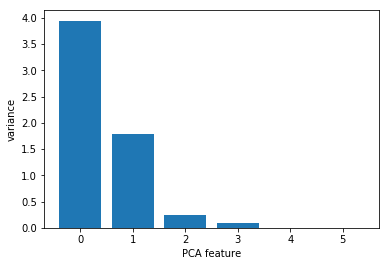

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

scaler = StandardScaler()
pca = PCA()

pipeline = make_pipeline(scaler, pca)

pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


### reduce the dimensionality

The fish measurement samples above had 6t features each.  We used PCA to figure out the intrinsic dimension of this data set, 2.  Now let's reduce the dimension to 2 using PCA.

Note: we need to scale the data as well.

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pca = PCA(n_components=2)

pipeline = make_pipeline(scaler, pca)
pipeline.fit(samples)

pca_features = pipeline.transform(samples)
print(pca_features.shape)

(85, 2)
